In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [2]:
#import the data
HG = yf.Ticker("HG=F")

In [3]:
data = yf.download("HG=F", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

Date
2017-01-03    2.4810
2017-01-04    2.5480
2017-01-05    2.5295
2017-01-06    2.5380
2017-01-09    2.5300
Name: Adj Close, dtype: float64

In [6]:
data.tail()

Date
2022-08-03    3.4695
2022-08-04    3.4830
2022-08-05    3.5530
2022-08-08    3.5875
2022-08-09    3.5925
Name: Adj Close, dtype: float64

In [7]:
log_returns = np.log(1 + data.pct_change())

In [8]:
log_returns.tail()

Date
2022-08-03   -0.015728
2022-08-04    0.003883
2022-08-05    0.019898
2022-08-08    0.009663
2022-08-09    0.001393
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

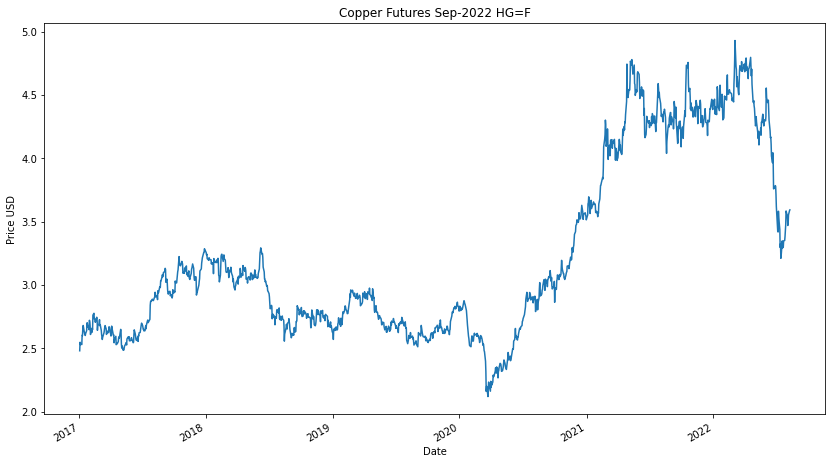

In [9]:
data.plot(figsize=(14,8))
plt.title('Copper Futures Sep-2022 HG=F')
plt.ylabel('Price USD')

In [10]:
u = log_returns.mean()
u

0.0002625437218605715

In [11]:
var = log_returns.var()
var

0.00019356095264434016

In [12]:
stdev = log_returns.std()
stdev

0.013912618468294894

In [13]:
drift = u - (0.5 * var)
drift

0.0001657632455384014

In [14]:
np.array(drift)

array(0.00016576)

In [15]:
np.array(stdev)

array(0.01391262)

In [16]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [17]:
x = np.random.rand(10,2)
x

array([[0.74366643, 0.45294351],
       [0.20327883, 0.07651484],
       [0.27882418, 0.52659643],
       [0.64656989, 0.71417094],
       [0.21918981, 0.06165398],
       [0.39176401, 0.86155246],
       [0.53133744, 0.74958754],
       [0.69275937, 0.15304556],
       [0.27652806, 0.08996297],
       [0.87856701, 0.86529619]])

In [18]:
norm.ppf(x)

array([[ 0.65469036, -0.11822799],
       [-0.82996663, -1.42891149],
       [-0.58633807,  0.06671682],
       [ 0.37607624,  0.56561119],
       [-0.77493237, -1.5410363 ],
       [-0.27472435,  1.08732076],
       [ 0.07863226,  0.67319237],
       [ 0.50368713, -1.02345848],
       [-0.59318684, -1.34098311],
       [ 1.16785322,  1.10442778]])

In [19]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.40294286,  0.23664464],
       [ 0.09451739, -0.6049662 ],
       [-1.21770995, -0.68655836],
       [-2.06857576, -1.10742227],
       [-0.05598621, -0.67536638],
       [-0.5225276 , -1.23074868],
       [-0.84483857, -0.30930984],
       [ 1.85964328, -0.74782068],
       [-0.39324804, -1.04493398],
       [-0.01899251, -1.0644929 ]])

In [20]:
t_intervals = 120
interations = 500

In [21]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[0.99638789, 1.03716246, 0.99830823, ..., 0.99796679, 1.01299309,
        0.98927462],
       [1.01226935, 1.02187714, 1.02628295, ..., 1.01466763, 1.00637977,
        1.01212759],
       [0.96719705, 0.98014695, 0.99348288, ..., 1.01854677, 1.02270919,
        0.99910533],
       ...,
       [1.01348412, 0.99317419, 1.00859732, ..., 0.99575302, 0.98862064,
        1.00772344],
       [0.98636762, 0.99725922, 1.00717656, ..., 1.02403377, 1.00560373,
        0.99928475],
       [0.97373812, 1.02341397, 0.9991466 , ..., 0.99880485, 0.99018173,
        1.00291502]])

In [22]:
s_zero = data.iloc[-1]
s_zero

3.5924999713897705

In [23]:
price_list = np.zeros_like(daily_returns)

In [24]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_list[0] = s_zero
price_list

array([[3.59249997, 3.59249997, 3.59249997, ..., 3.59249997, 3.59249997,
        3.59249997],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[3.59249997, 3.59249997, 3.59249997, ..., 3.59249997, 3.59249997,
        3.59249997],
       [3.63657762, 3.6710936 , 3.68692149, ..., 3.64519343, 3.6154193 ,
        3.63606833],
       [3.51728716, 3.5982112 , 3.66289336, ..., 3.7128    , 3.69752256,
        3.63281524],
       ...,
       [2.72837165, 3.5108897 , 3.50707131, ..., 3.87921168, 4.0475467 ,
        3.31410865],
       [2.69117746, 3.50126711, 3.53224002, ..., 3.97244376, 4.07022806,
        3.31173825],
       [2.62050208, 3.58324566, 3.52922561, ..., 3.96769609, 4.03026547,
        3.32139204]])

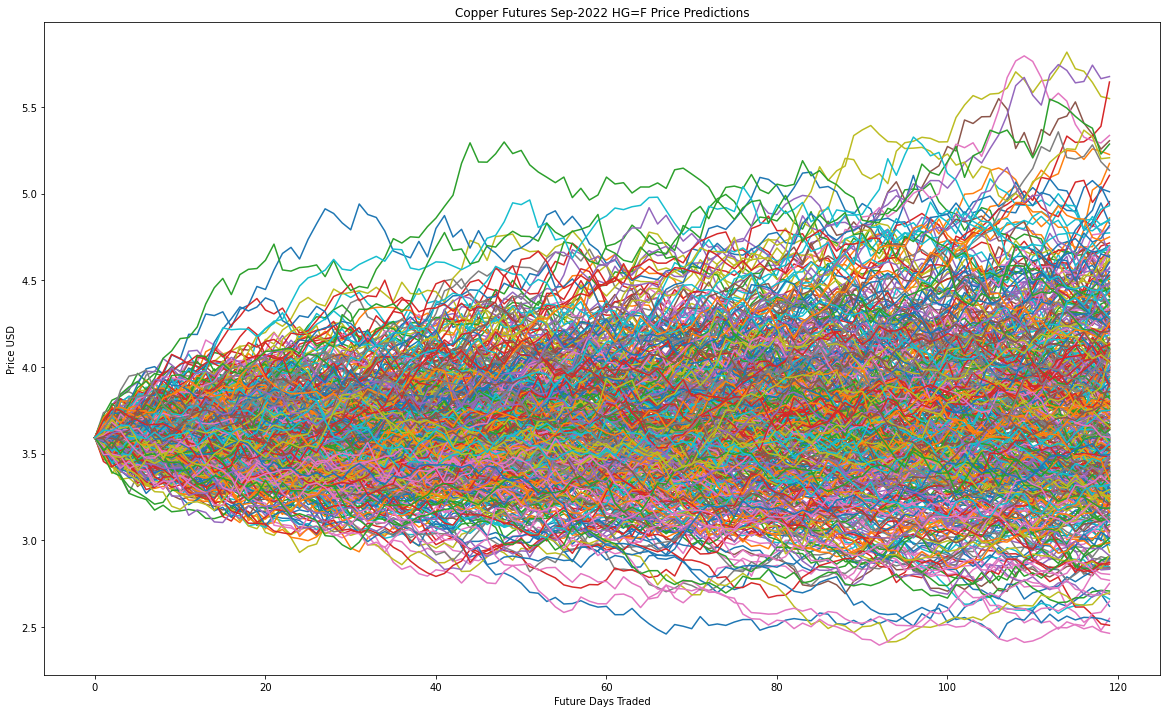

In [28]:
plt.figure(figsize=(20,12))
plt.title('Copper Futures Sep-2022 HG=F Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)